In [2]:
# Gym stuff
import gymnasium as gym
import gym_anytrading
import torch

# Stable baselines - rl stuff
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.callbacks import BaseCallback
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import random
import seaborn as sns

In [3]:
df = pd.read_csv('../data/appldata.csv')
df.head()
# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-03-27,173.31,170.30,173.58,170.14,59.11M,2.12%
2024-03-26,169.71,170.01,171.41,169.65,57.22M,-0.67%
2024-03-25,170.85,170.37,171.94,169.46,54.21M,-0.83%
2024-03-22,172.28,171.76,173.05,170.06,71.16M,0.53%
2024-03-21,171.37,177.05,177.49,170.84,106.18M,-4.09%


info: {'total_reward': -8.55999755859375, 'total_profit': 0.8092245240648301, 'position': <Positions.Short: 0>}
Total reward: -8.55999755859375


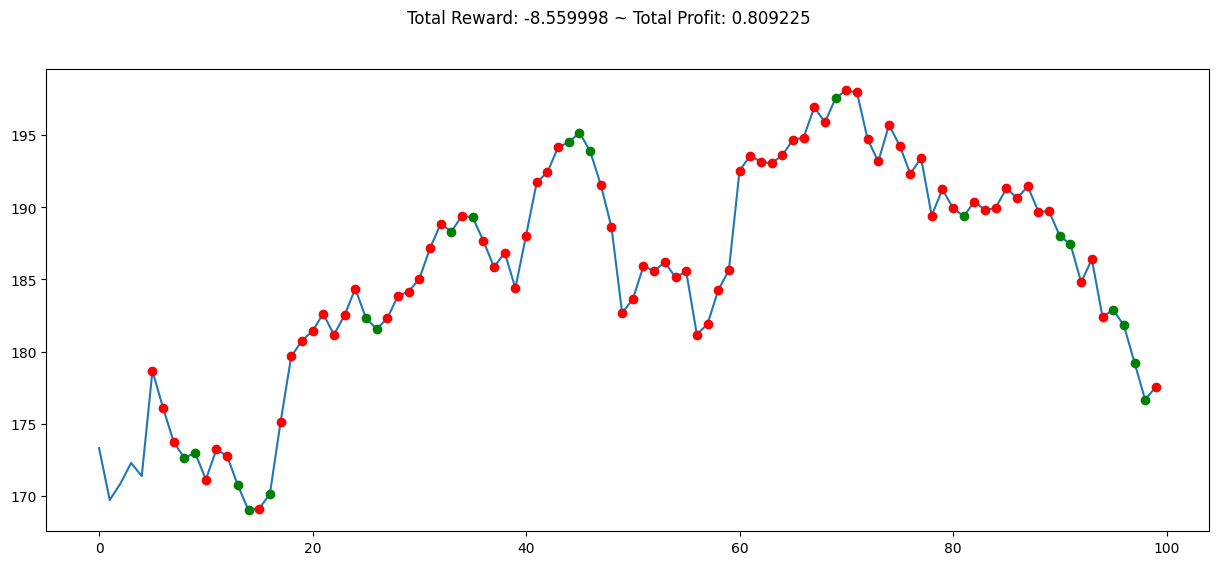

In [ ]:
# Initialize the environment
env = gym.make('stocks-v0', df=df, frame_bound=(5, 100), window_size=5)
model = PPO.load("../models/model_v1")  # Change to your saved model path

# Test the model
observation, info = env.reset()  # Reset the environment

done = False
total_reward = 0

while not done:
    action, _states = model.predict(observation)  # Get action from the model
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward  # Accumulate the reward
    done = terminated or truncated  # Check if episode is done
    
    if done:
        print("info:", info)  # Output additional information when done
        break


print(f"Total reward: {total_reward}")
# Plot the results
plt.figure(figsize=(15, 6))
plt.cla()
# Ensure this method is correctly defined in your environment
env.unwrapped.render_all()  
plt.show()